In [70]:
#...................................Industrial-Copper-Modeling..............................................................

#Import useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

import pickle

#For Reggresion model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV




#For classification model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from  xgboost import XGBRFClassifier
from sklearn.metrics import accuracy_score,auc,confusion_matrix,classification_report











In [3]:
#Load the data
data=pd.read_csv("C:/Users/admin pc/Downloads/Copper_Set.xlsx - Result 1.csv")

In [4]:
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [5]:
#To get shape of data,ie Number of rows and Features,
data.shape

(181673, 14)

In [6]:
#To get information about the data,data type of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [7]:
#Using describe we will get statistical summary of numerical features
data.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [8]:
data.keys()

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [9]:
#To check null values
data.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

Text(0.5, 1.0, 'Before cleaning process')

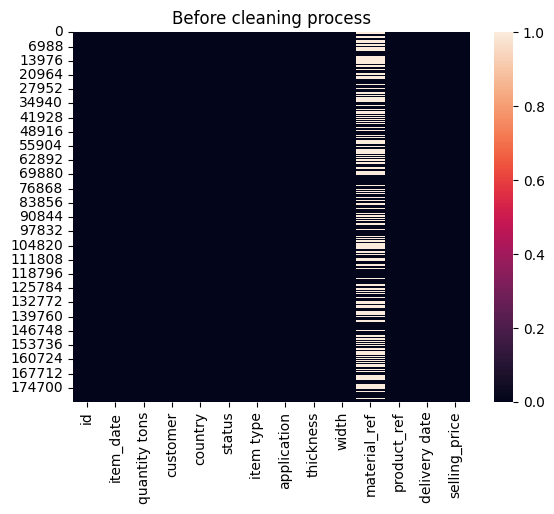

In [10]:
#Heat map for showing null values in the data
ax=sns.heatmap(data.isnull())
ax.set_title("Before cleaning process")

In [11]:
data_1=data.copy()

In [12]:
#Meterial reference feature has lot of null values(77919)so drop the column,and drop id feature also
data_1.drop(["material_ref","id"],axis=1,inplace=True)

## Preprocessing of data


In [13]:
#we see that pandas has loaded some of the numerical features as object type.We will explicitly convert those columns into numerical

In [14]:
def data_convert():
        #"quantity tons",contain a non numerical value we have to replace that with NaN
        data_1["quantity tons"]=pd.to_numeric(data_1["quantity tons"],errors="coerce")
        #To convert catogorical "item type" feature to numerical using label encoding
        label_encoder=preprocessing.LabelEncoder()
        data_1['item type']=label_encoder.fit_transform(data_1['item type'])
        #Similarly convert "status" catogorical feature to numerical (machine learning model only take numerical data)
        label_encoder2=preprocessing.LabelEncoder()
        data_1['status']=label_encoder2.fit_transform(data_1['status'])



        #Convert float data type to date format by converting non date value to NaN
        data_1["item_date"]=pd.to_datetime(data_1["item_date"],format="%Y%m%d",errors="coerce")
        data_1["delivery date"]=pd.to_datetime(data_1["delivery date"],format="%Y%m%d",errors="coerce")
        return data_1
new_data=data_convert()

In [71]:
#Now let's check encoded data
new_data['item type'].unique()

array([5, 6, 3, 1, 2, 0, 4])

In [16]:
new_data.isnull().sum()

item_date         3
quantity tons     1
customer          1
country          28
status            0
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

array([[<Axes: title={'center': 'country'}>,
        <Axes: title={'center': 'status'}>,
        <Axes: title={'center': 'customer'}>],
       [<Axes: title={'center': 'application'}>,
        <Axes: title={'center': 'thickness'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'quantity tons'}>, <Axes: >, <Axes: >]],
      dtype=object)

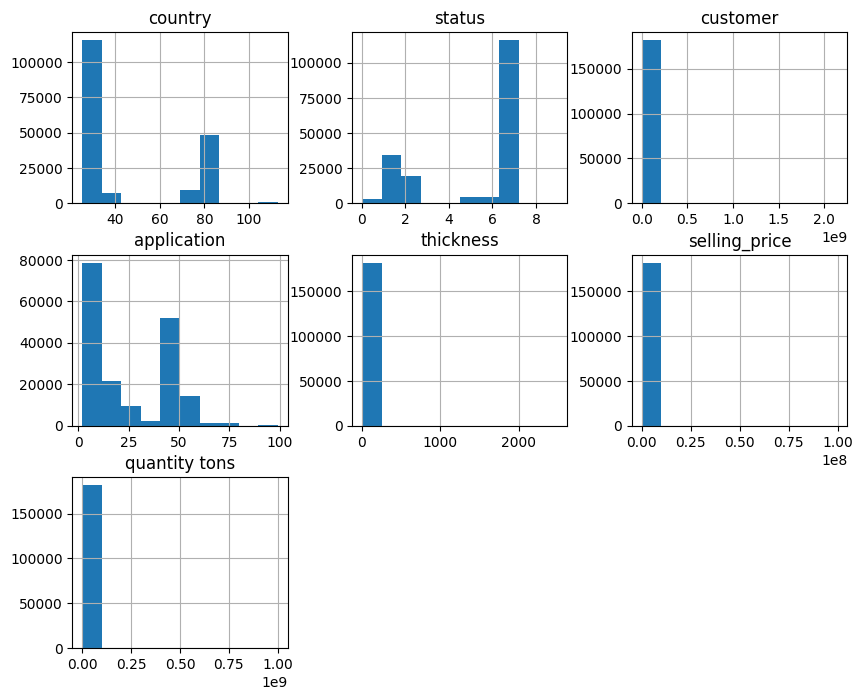

In [17]:
#plot hisogram to check distribution of data 
features=["country", "status","customer","application","thickness","selling_price","quantity tons"]
new_data[features].hist(figsize=(10,8))

In [18]:
#in this plots we can see that distribution in features is skewed so we can fill the missing value with median
def missing_fill():
    new_data["country"].fillna(new_data["country"].median(),inplace=True)
    new_data["customer"].fillna(new_data["customer"].median(),inplace=True)
    new_data["application"].fillna(new_data["application"].median(),inplace=True)
    new_data["thickness"].fillna(new_data["thickness"].median(),inplace=True)
    new_data["selling_price"].fillna(new_data["selling_price"].median(),inplace=True)
    new_data["quantity tons"].fillna(new_data["quantity tons"].median(),inplace=True)
    #Handling missing data in catogorical feature 
    new_data["status"].fillna(new_data["status"].mode().iloc[0],inplace=True)
    #we can handle the missing data in datetime feature by mode
    new_data["item_date"].fillna(new_data["item_date"].mode().iloc[0],inplace=True)
    new_data["delivery date"].fillna(new_data["delivery date"].mode().iloc[0],inplace=True)
    return new_data
cleaned_data=missing_fill()

In [19]:
#Let's check after cleaning all the missing values
cleaned_data.isnull().sum() 

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

Text(0.5, 1.0, 'After cleaning process')

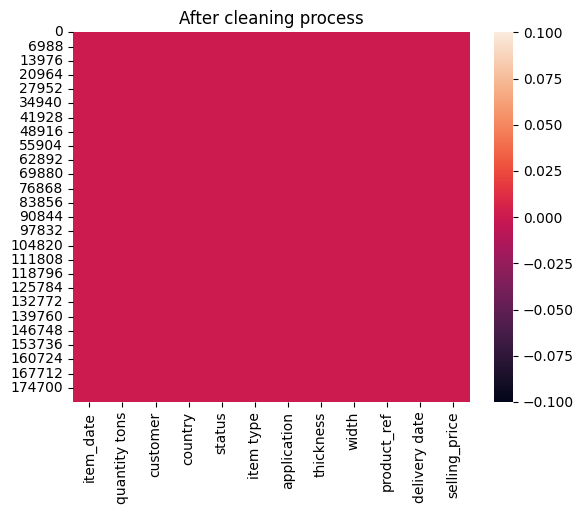

In [20]:
ax=sns.heatmap(cleaned_data.isnull())
ax.set_title("After cleaning process")

In [21]:
#Check distribution of data
def plot(df, column):
    plt.figure(figsize=(14,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')
    print(f'{column}')
    print("skew: " ,skew(df[column]))

    
    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

quantity tons
skew:  424.6873099438388


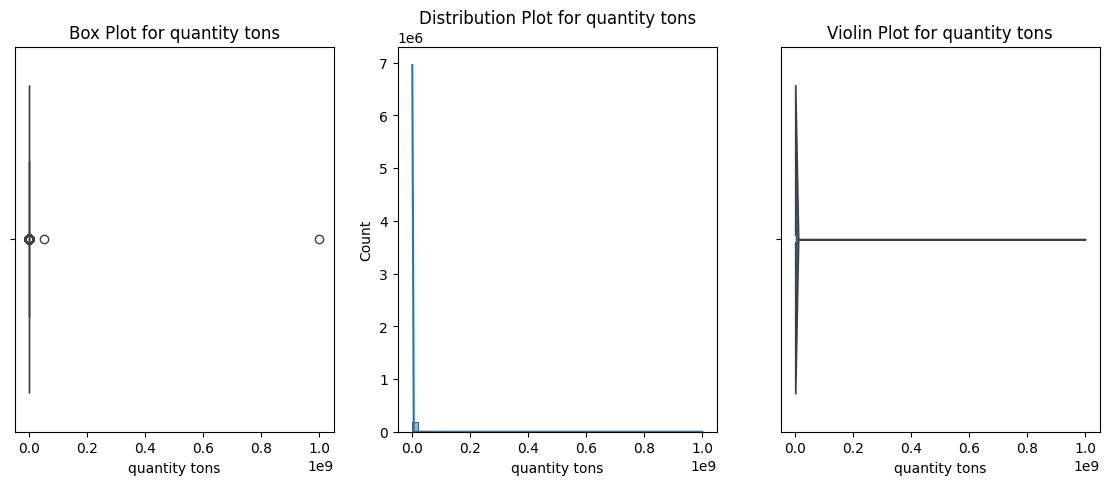

customer
skew:  86.9845901502091


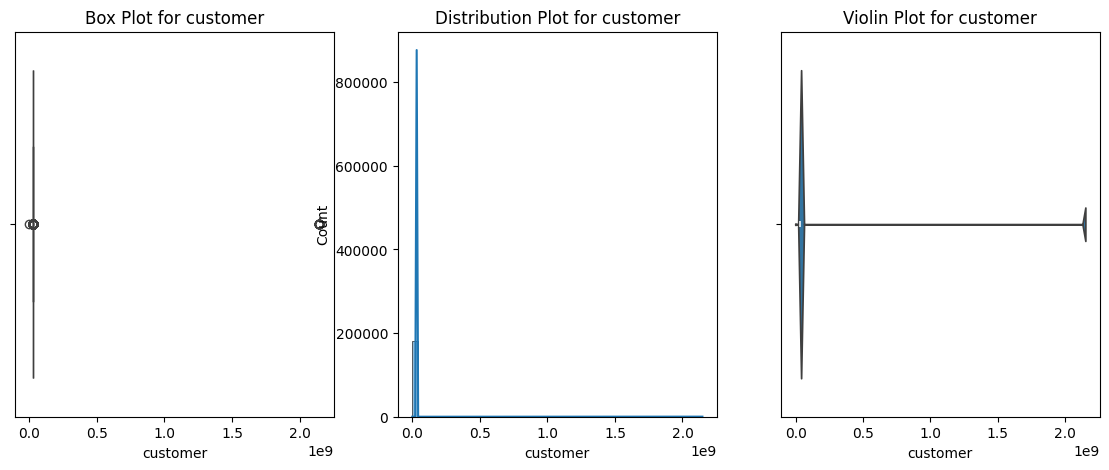

country
skew:  0.7538286488466676


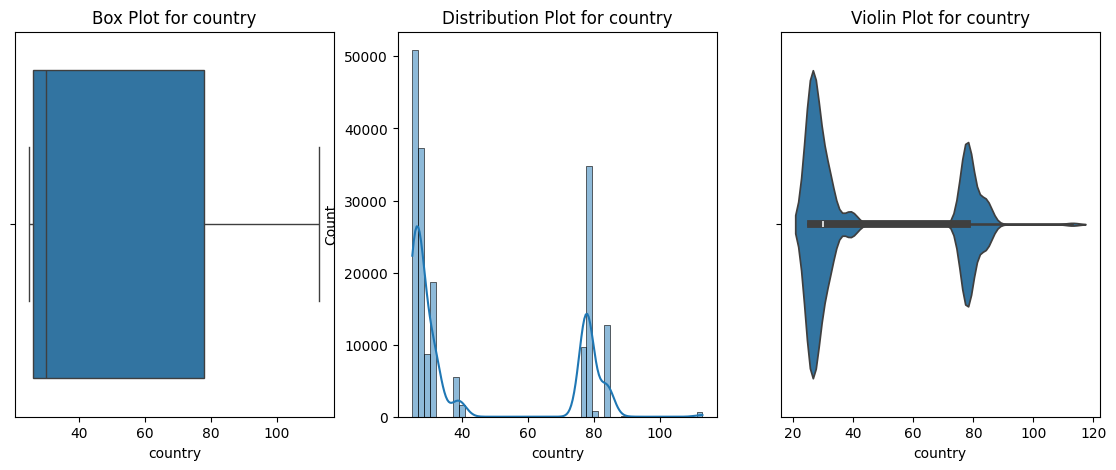

item type
skew:  -0.4875330421068981


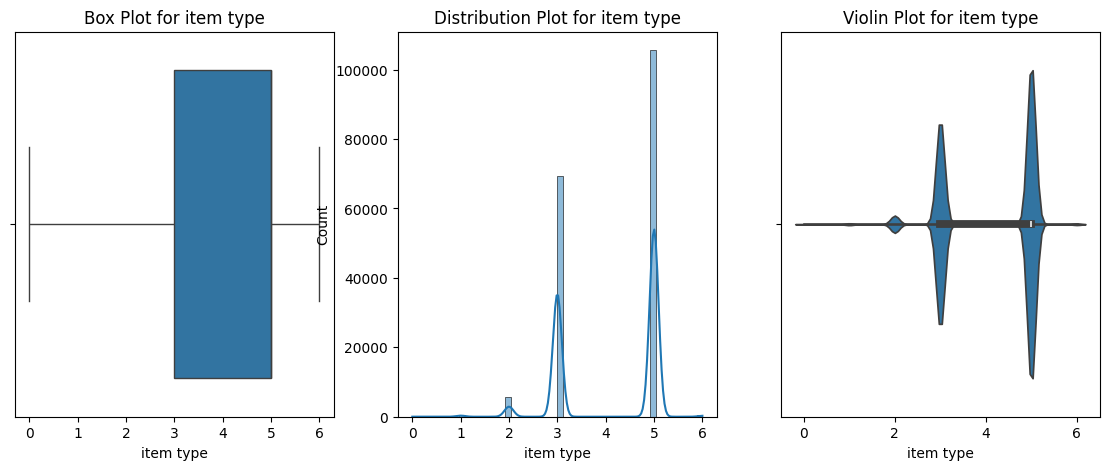

application
skew:  0.7245583983073829


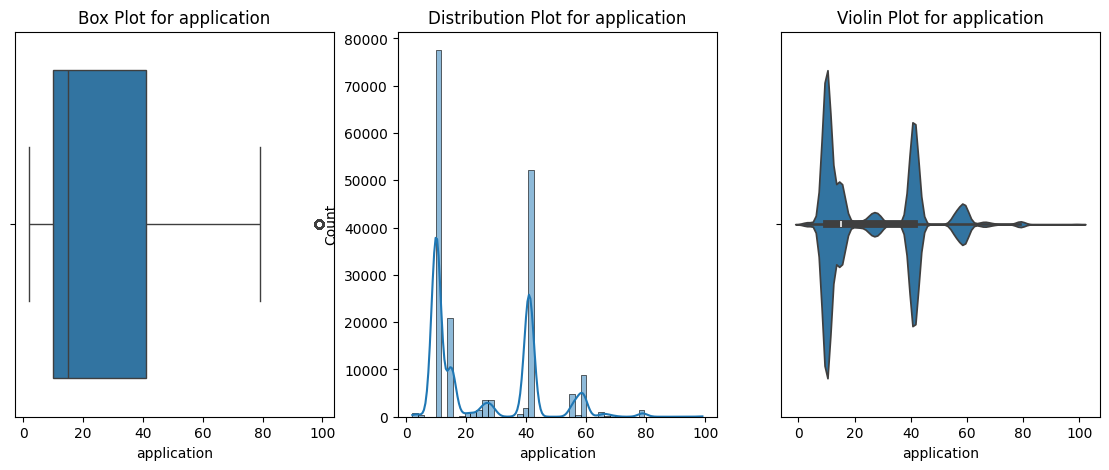

thickness
skew:  303.4450657126513


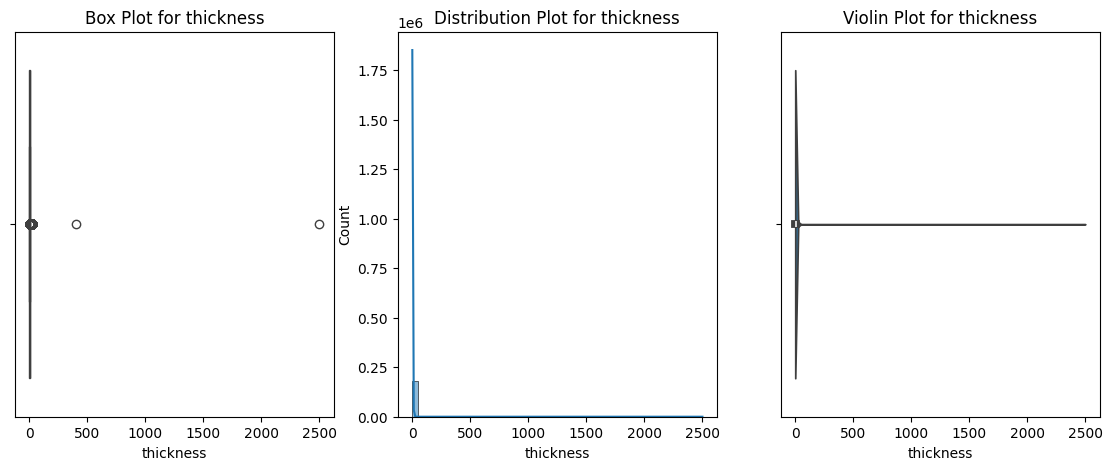

width
skew:  0.37459367901082125


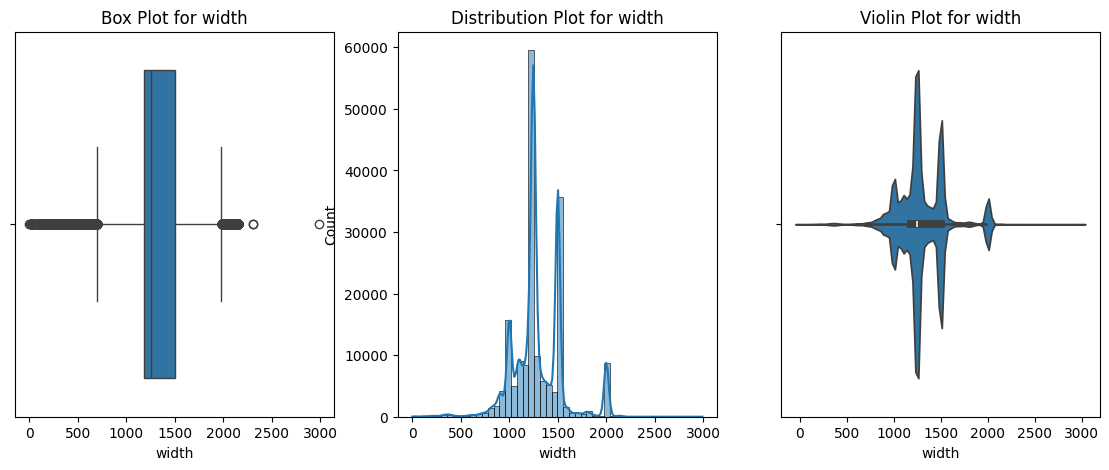

product_ref
skew:  1.0152071910463223


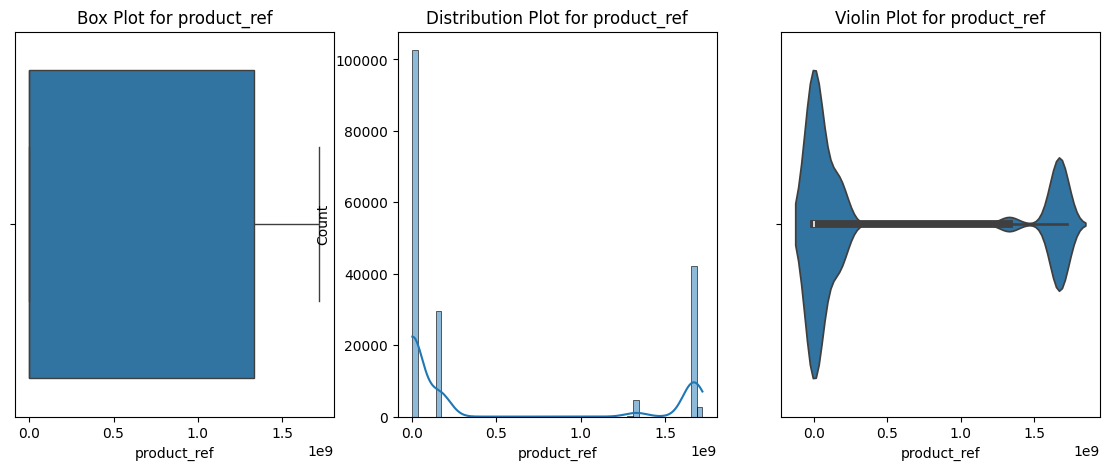

selling_price
skew:  301.3855994614937


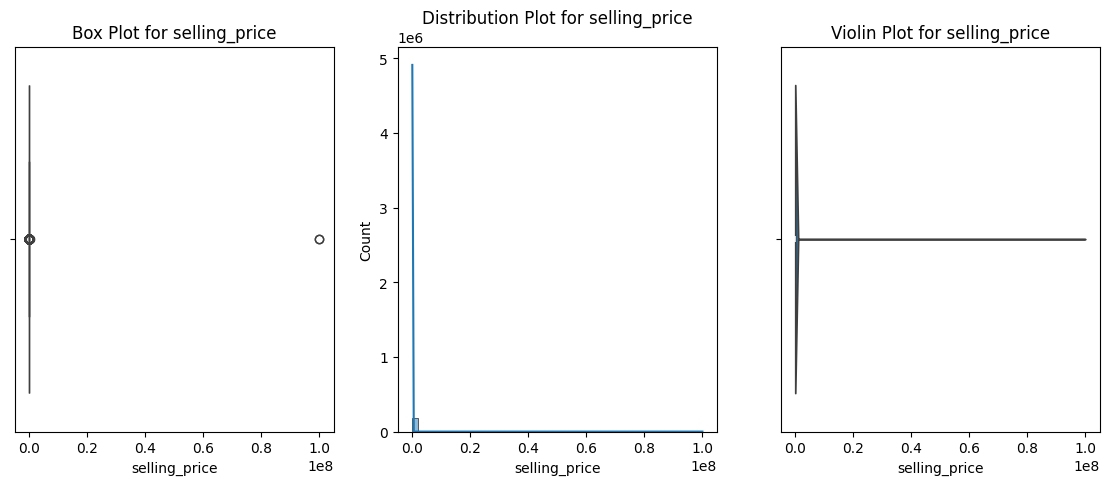

In [22]:
columns=[]
for col in cleaned_data.drop(["delivery date","item_date",'status'],axis=1):
    columns.append(col)
    
for i in columns :
    plot(cleaned_data, i)

In [23]:
#from above plot we can see that almost all the features are skwed,among them 'quantity tons', 'customer,'thickness', 'selling_price' very highly skewed,
#So applay log transformation method to change skewed data to normal

In [24]:
l=[]
for i in  cleaned_data["quantity tons"].values:
    if i<=0:
        i=np.nan
        l.append(i)
    else:
        l.append(i)  
cleaned_data["quantity tons"]=l

In [25]:
list2=[]
for item2 in  cleaned_data["selling_price"].values:
    if item2<=0:
        item2=np.nan
        list2.append(item2)
    else:
        list2.append(item2)  
cleaned_data["selling_price"]=list2

In [26]:
cleaned_data.isnull().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [27]:
cleaned_data.dropna(inplace=True)

In [28]:
cleaned_data_new=cleaned_data.copy()

In [29]:
#To remove skewness i have used log transformation   method
cleaned_data["quantity_tons_log"]=np.log(cleaned_data["quantity tons"])
cleaned_data["selling_price_log"]=np.log(cleaned_data["selling_price"])
cleaned_data["customer_log"]=np.log(cleaned_data["customer"])
cleaned_data["thickness_log"]=np.log(cleaned_data["thickness"])
cleaned_data["product_ref_log"]=np.log(cleaned_data["product_ref"])



In [30]:
cleaned_data.drop(["quantity tons","customer","selling_price","thickness","product_ref"],axis=1,inplace=True)

In [31]:
#This plot shows the distribution after remove the skewness
def plot(df, column):
    plt.figure(figsize=(14,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')


    
    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

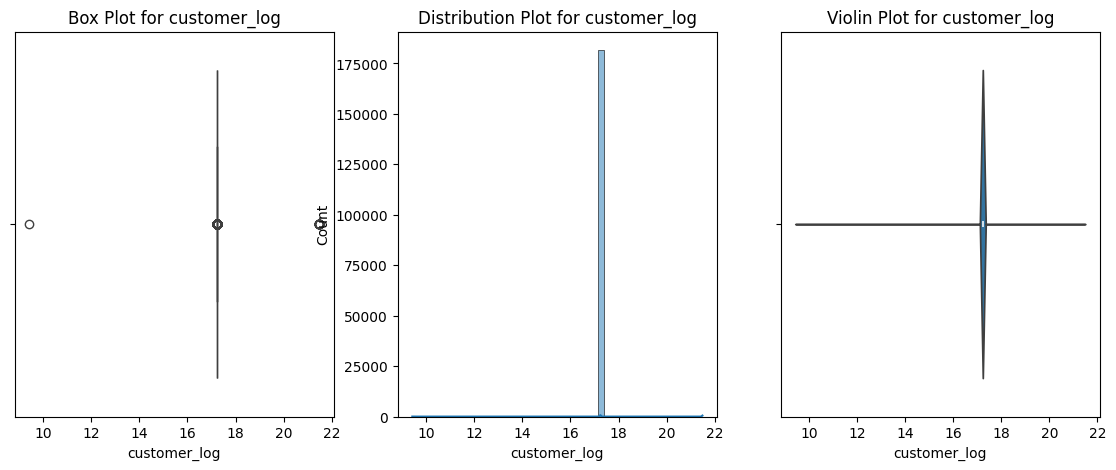

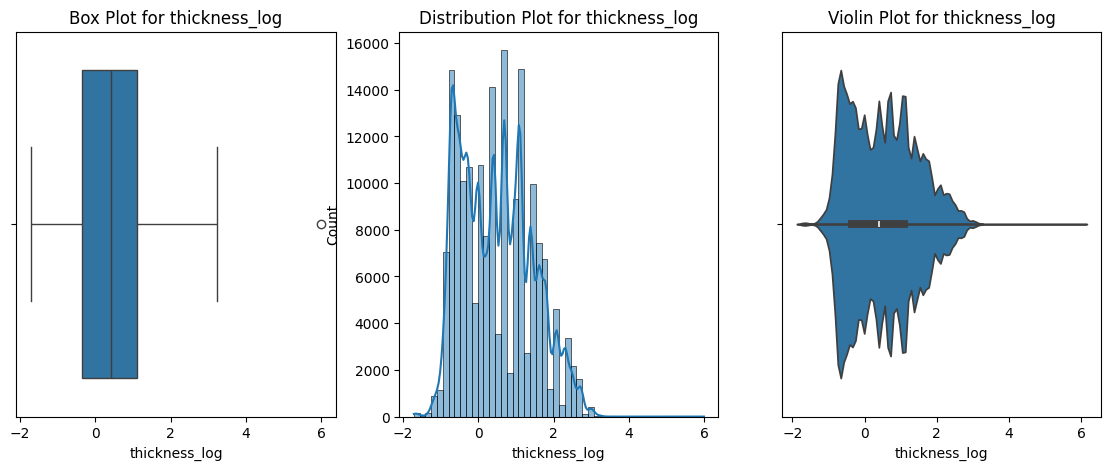

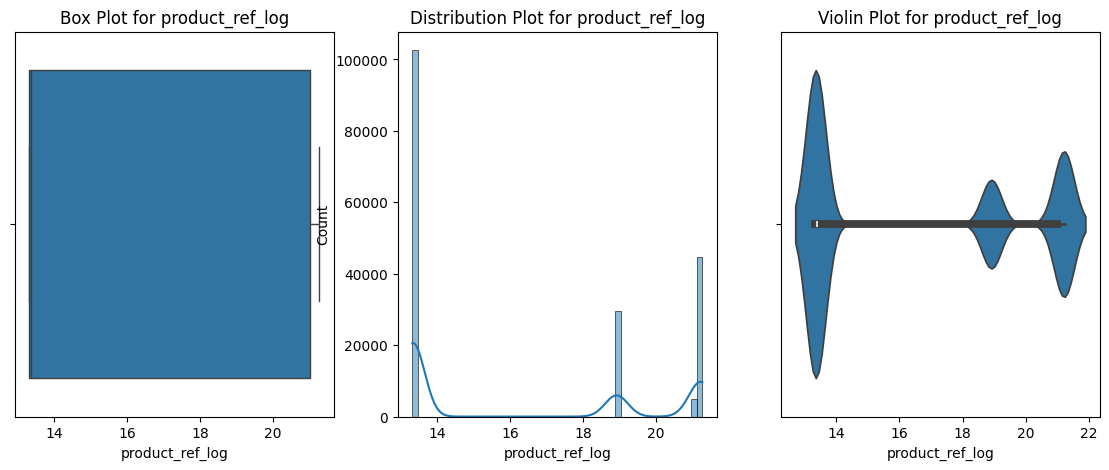

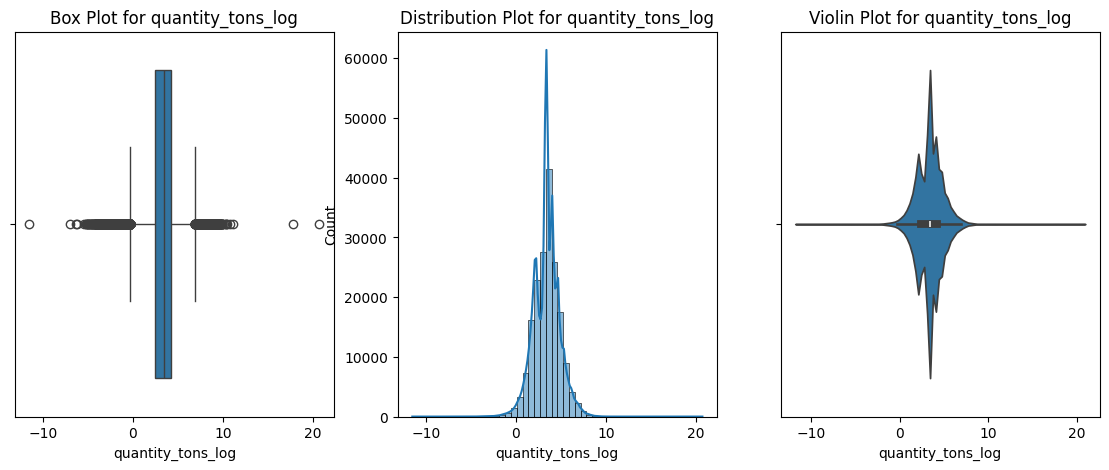

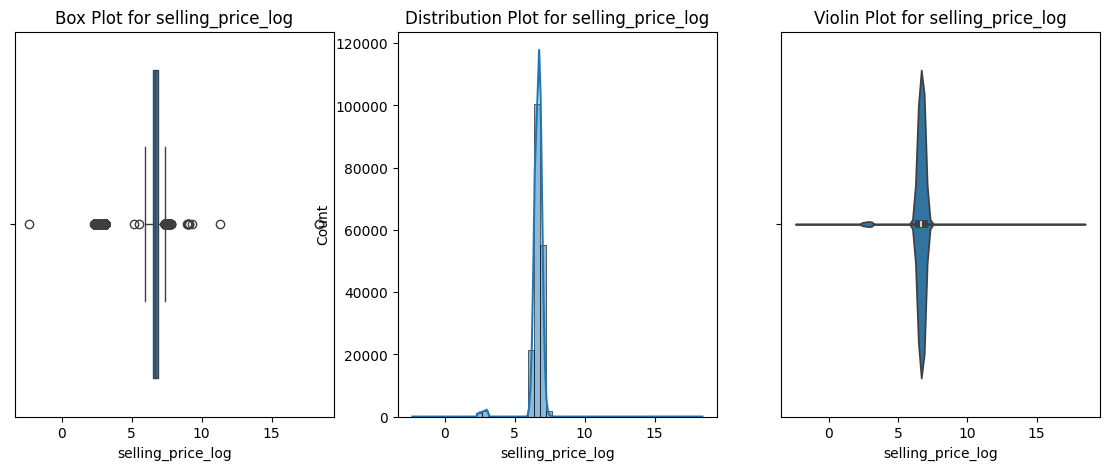

In [32]:

for i in ["customer_log","thickness_log","product_ref_log","quantity_tons_log","selling_price_log"] :
    plot(cleaned_data,i)

In [33]:
#Now i am going to remove outlier,Using statistical method (IQR)

In [34]:
def out(df,column):
    q1=df[column].quantile(.25)
    q3=df[column].quantile(.75)
    IQR=q1-q3
    uppr=q3+(1.5*IQR)
    lwr=q1-(1.5*IQR)
    df[column]=df[column].clip(uppr,lwr)
    return df
for item1 in ["customer_log","thickness_log","product_ref_log","quantity_tons_log","selling_price_log"]: 
                                                   df1=out(cleaned_data,item1)


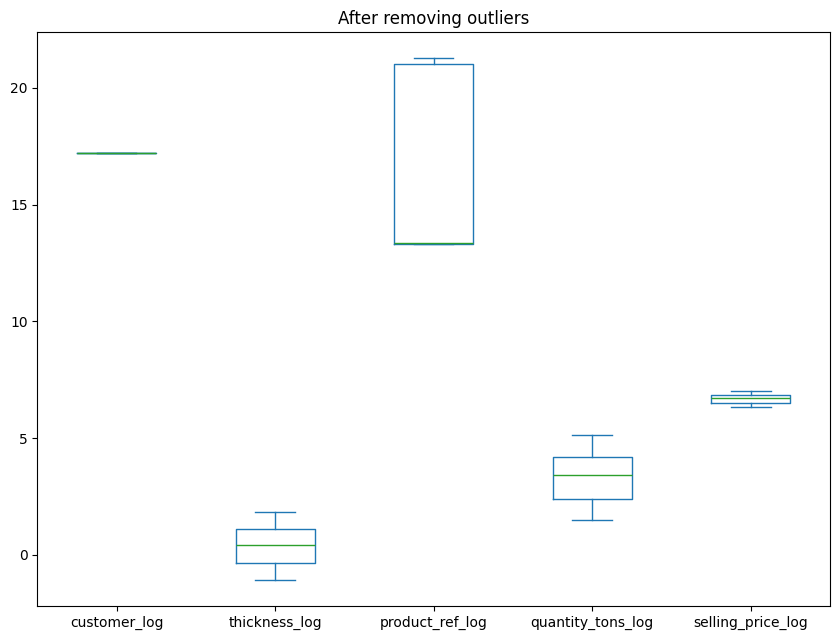

In [35]:
#Let's check the  plot After removing the oulier
plt.rcParams["figure.figsize"] = [8.50, 6.50]
plt.rcParams["figure.autolayout"] = True

ax1=df1[["customer_log","thickness_log","product_ref_log","quantity_tons_log","selling_price_log"]].plot(kind="box",title="After removing outliers")
plt.show()

<Axes: >

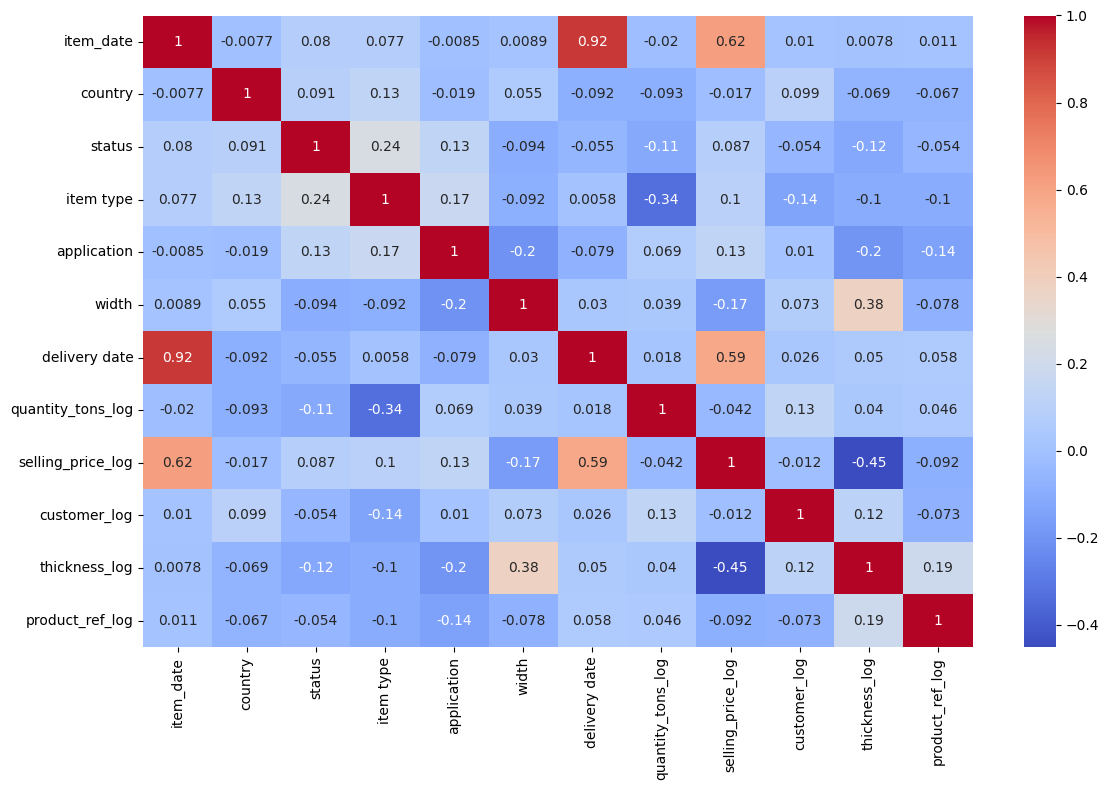

In [36]:
#lt's check correlation between the features
plt.figure(figsize=(12,8))
sns.heatmap(cleaned_data.corr(),annot=True,cmap="coolwarm")

In [37]:
#There are high correlations between selling_price and item date,delivery date compare to other features

In [38]:
cleaned_data1=cleaned_data.copy()

In [39]:
#let's convert date time into year month day saparatly
cleaned_data['item_date_year']=cleaned_data["item_date"].dt.year
cleaned_data['item_date_month']=cleaned_data["item_date"].dt.month
cleaned_data['item_date_day']=cleaned_data["item_date"].dt.day
cleaned_data['delivery_date_year']=cleaned_data["delivery date"].dt.year
cleaned_data['delivery_date_month']=cleaned_data["delivery date"].dt.month
cleaned_data['delivery_date_day']=cleaned_data["delivery date"].dt.day


In [40]:
cleaned_data.drop(["item_date","delivery date"],axis=1,inplace=True)


In [41]:
#Here completed the preprocessing of given data,Now going to select the model

## Regression Method - Predict the Selling Price

In [42]:
#To get dependend and indepndend variables saparatly
x=cleaned_data.drop(["selling_price_log"],axis=1)
y=cleaned_data["selling_price_log"]
#Normalise the data using standerd scalar
scalar=StandardScaler()
x=scalar.fit_transform(x)

In [43]:
#split the data as train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)

     

In [44]:
#Model selection
models=[("RandomForestRegressor",RandomForestRegressor()),
        ("GradientBoostingRegressor",GradientBoostingRegressor()),
        ("DecisionTreeRegressor",DecisionTreeRegressor()),
        ("ExtraTreesRegressor",ExtraTreesRegressor()),
        ("XGBRegressor",XGBRegressor())]

In [45]:
for name,model in models:
    print(name,":")
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print("r2_score :\n",r2_score(y_test,y_predict))
    print()
    print("mean_absolute_error :\n",mean_absolute_error(y_test,y_predict))
    print()
    print("mean_squared_error :\n",mean_squared_error(y_test,y_predict))
    print()

RandomForestRegressor :
r2_score :
 0.9635940430616885

mean_absolute_error :
 0.02502591815101657

mean_squared_error :
 0.001716254573055057

GradientBoostingRegressor :
r2_score :
 0.8921116137715379

mean_absolute_error :
 0.05316258805997238

mean_squared_error :
 0.00508608897598493

DecisionTreeRegressor :
r2_score :
 0.9378380271064749

mean_absolute_error :
 0.02977444300349783

mean_squared_error :
 0.0029304481799341782

ExtraTreesRegressor :
r2_score :
 0.9613329261941005

mean_absolute_error :
 0.025199786158827554

mean_squared_error :
 0.0018228484519300283

XGBRegressor :
r2_score :
 0.9472671113004821

mean_absolute_error :
 0.03487437576043833

mean_squared_error :
 0.002485941010541346



In [46]:
#From the above evaluation  result we can see that RandomForestRegressor is the best algorithm for model(with 0.9667078099153891 r2 score)

In [47]:
#Train the model using RandomForestRegressor algorithm 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
Reggression_model=RandomForestRegressor()
Reggression_model.fit(x_train,y_train)
y_predict=Reggression_model.predict(x_test)

#Evaluation of model with selected algorithm
MSE = mean_squared_error(y_test, y_predict)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)

print('R2:', R2)
print('Mean Absolute Error :', MAE)
print('Mean Squared Error :', MSE)         
print('Root Mean Squared Error:', RMSE)         


R2: 0.9633683255951494
Mean Absolute Error : 0.025164276580847647
Mean Squared Error : 0.0017406889812165837
Root Mean Squared Error: 0.041721564942084614


In [48]:
#The RandomForestRegressor model give a good r2 score and low errors ie,difference between actual value and predicted value

In [49]:
#To store the model using pickling method
import pickle
#serailising
with open("Regression_model.pk1","wb") as f1:
    pickle.dump(Reggression_model,f1)

with open("Scalar.pk1","wb") as f2:
    pickle.dump(scalar,f2)

In [50]:
#de-serialing
with open("Regression_model.pk1","rb") as f3:
    R_model=pickle.load(f3)

with open("Scalar.pk1","rb") as f4:
    scalar=pickle.load(f4)


In [51]:
#predict the output by giving unseen data
test=np.array([[25.000000,7.000000,5.000000,26.000000,1062.000000,5.238603,17.223530,0.405465,21.236568,2021.000000,4.000000,1.000,2021.00,7.00,1.00]])
test=scalar.transform(test)
y_p=R_model.predict(test)
print(y_p)

[6.97707863]


In [52]:
#we have trained and stored the reggression model ,NOw let"s move into classification model selection and training

#Have to predict the catogarical feature status

## Classification Method - Predict status (Won/Lost)

In [53]:


new_cleaned_data=cleaned_data[(cleaned_data["status"]==1)|(cleaned_data["status"]==7)]
new_cleaned_data.status = new_cleaned_data.status.map({1: 0, 7: 1})


In [54]:
new_cleaned_data.status.value_counts()

status
1    116002
0     34438
Name: count, dtype: int64

In [55]:
#Here we can see that the data is not balanced,we should balance the data otherwise model will learn from majority
#So balance the data using SMOTE((Synthetic Minority Over-sampling Technique)

X=new_cleaned_data.drop("status",axis=1)
Y=new_cleaned_data["status"]


In [56]:
#imbalanced data
Y.value_counts()

status
1    116002
0     34438
Name: count, dtype: int64

In [57]:
X_new,Y_new= SMOTETomek().fit_resample(X,Y)

In [58]:
#Balanced data
Y_new.value_counts()

status
1    115175
0    115175
Name: count, dtype: int64

In [59]:
#Train the model
scalar_=StandardScaler()
X_new=scalar_.fit_transform(X_new)
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y_new,test_size=.2)

In [60]:
#algorithms for classification....model selection 
Models=[("RandomForestClassifier",RandomForestClassifier()),
        ("DecisionTreeClassifier",DecisionTreeClassifier()),
        ("ExtraTreesClassifier",ExtraTreesClassifier()),
        ("GradientBoostingClassifier",GradientBoostingClassifier()),
        ("XGBRFClassifier",XGBRFClassifier())]

        

In [61]:
for name1,Model1 in Models:
            print(name1 ,":")
            Model1.fit(X_train,Y_train)
            y_pred=Model1.predict(X_test)
            print("accuracy_score_test : ",accuracy_score(Y_test,y_pred))
            print("\n")
            print("classification_report : ",classification_report(Y_test,y_pred))
            print("confusion_matrix : ",confusion_matrix(Y_test,y_pred))


RandomForestClassifier :
accuracy_score_test :  0.9807032776210115


classification_report :                precision    recall  f1-score   support

           0       0.97      0.99      0.98     23004
           1       0.99      0.97      0.98     23066

    accuracy                           0.98     46070
   macro avg       0.98      0.98      0.98     46070
weighted avg       0.98      0.98      0.98     46070

confusion_matrix :  [[22718   286]
 [  603 22463]]
DecisionTreeClassifier :
accuracy_score_test :  0.9616887345344042


classification_report :                precision    recall  f1-score   support

           0       0.96      0.96      0.96     23004
           1       0.96      0.96      0.96     23066

    accuracy                           0.96     46070
   macro avg       0.96      0.96      0.96     46070
weighted avg       0.96      0.96      0.96     46070

confusion_matrix :  [[22146   858]
 [  907 22159]]
ExtraTreesClassifier :
accuracy_score_test :  0.98352507

In [62]:
#The algorith ExtraTreesClassifier is best for model because it has high accuracy compare to other

In [63]:
#Let's train the data using  ExtraTreesClassifier  algorithm
classification_model=ExtraTreesClassifier()
classification_model.fit(X_train,Y_train)
Y_predict=classification_model.predict(X_test)
 


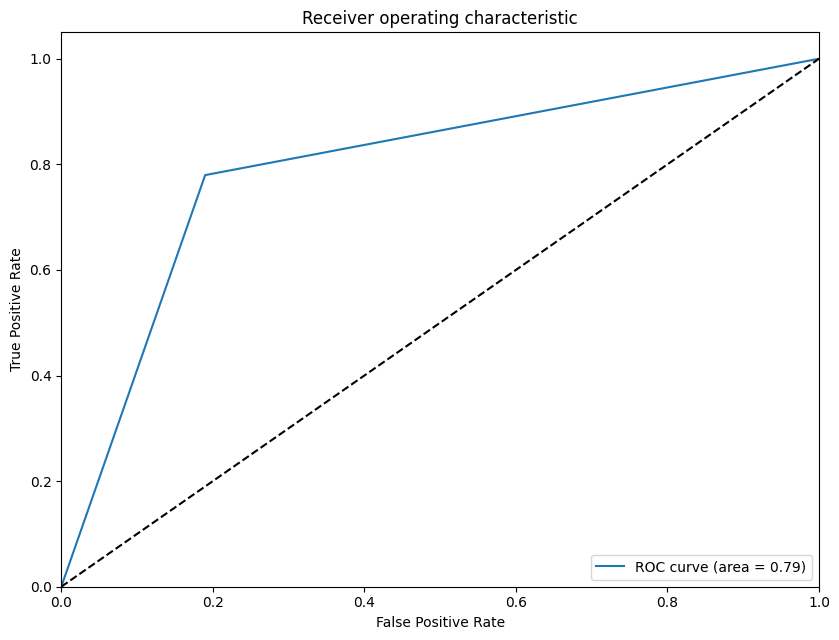

In [64]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [65]:

#serailising
with open("classification_model.pk1","wb") as f:
    pickle.dump(classification_model,f)

with open("Scalar_C.pk1","wb") as f_:
    pickle.dump(scalar_,f_)




In [66]:
#de-serialing
with open("classification_model.pk1","rb") as f4:
    C_model=pickle.load(f4)


with open("Scalar_C.pk1","rb") as f4_:
    Scalar=pickle.load(f4_)

In [72]:
test=np.array([[28.0,7,10.0,1250.0,np.log(14.09364),np.log(1428.0),np.log(30271717.0),np.log(1.1),np.log(611993),2021,4,1,2021,7,1]])
new_test=scalar_.transform(test)

y_p=C_model.predict(new_test)   
if y_p==1:
    print("WIN")
else:
    print("LOST")

WIN


In [73]:
test2=np.array([[77.0,3,10.0,1500.0,np.log(39.553513),np.log(1225.0),np.log(30165992.0),np.log(1.0),np.log(164141591),2021,4,1,2021,8,1]])
new_test2=scalar_.transform(test2)

y_p2=C_model.predict(new_test2)   
if y_p2==1:
    print("WIN")
else:
    print("LOST")

LOST


In [ ]:
#we have trined both classification and regresssion models for catogorical and continues variable prediction
#Now have to predict the depended variable "selling price"(continues) and status(catogory) by getting input from user using streamlit application